In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Reading combined df

In [5]:
import pandas as pd

# Path to the filtered CSV file
combine = '/content/gdrive/MyDrive/PhD_Data/combined/Combined_dataset_utk_fgnet_morph_allface.csv'

# Read the filtered CSV file into a DataFrame
combine = pd.read_csv(combine)

# Display the first few rows of the DataFrame to verify the contents
combine

filename  age  gender ethnicity
0          078A12_1.JPG   12       1         W
1          078A05_1.JPG    5       1         W
2          077A15_0.JPG   15       0         W
3          076A01_0.JPG    1       0         W
4          075A06_1.JPG    6       1         W
...                 ...  ...     ...       ...
12209  282278_04M20.JPG   20       1         B
12210  326393_02M19.JPG   19       1         W
12211  326759_03M18.JPG   18       1         W
12212  330586_03M16.JPG   16       1         W
12213  279966_01M20.JPG   20       1         B

[12214 rows x 4 columns]

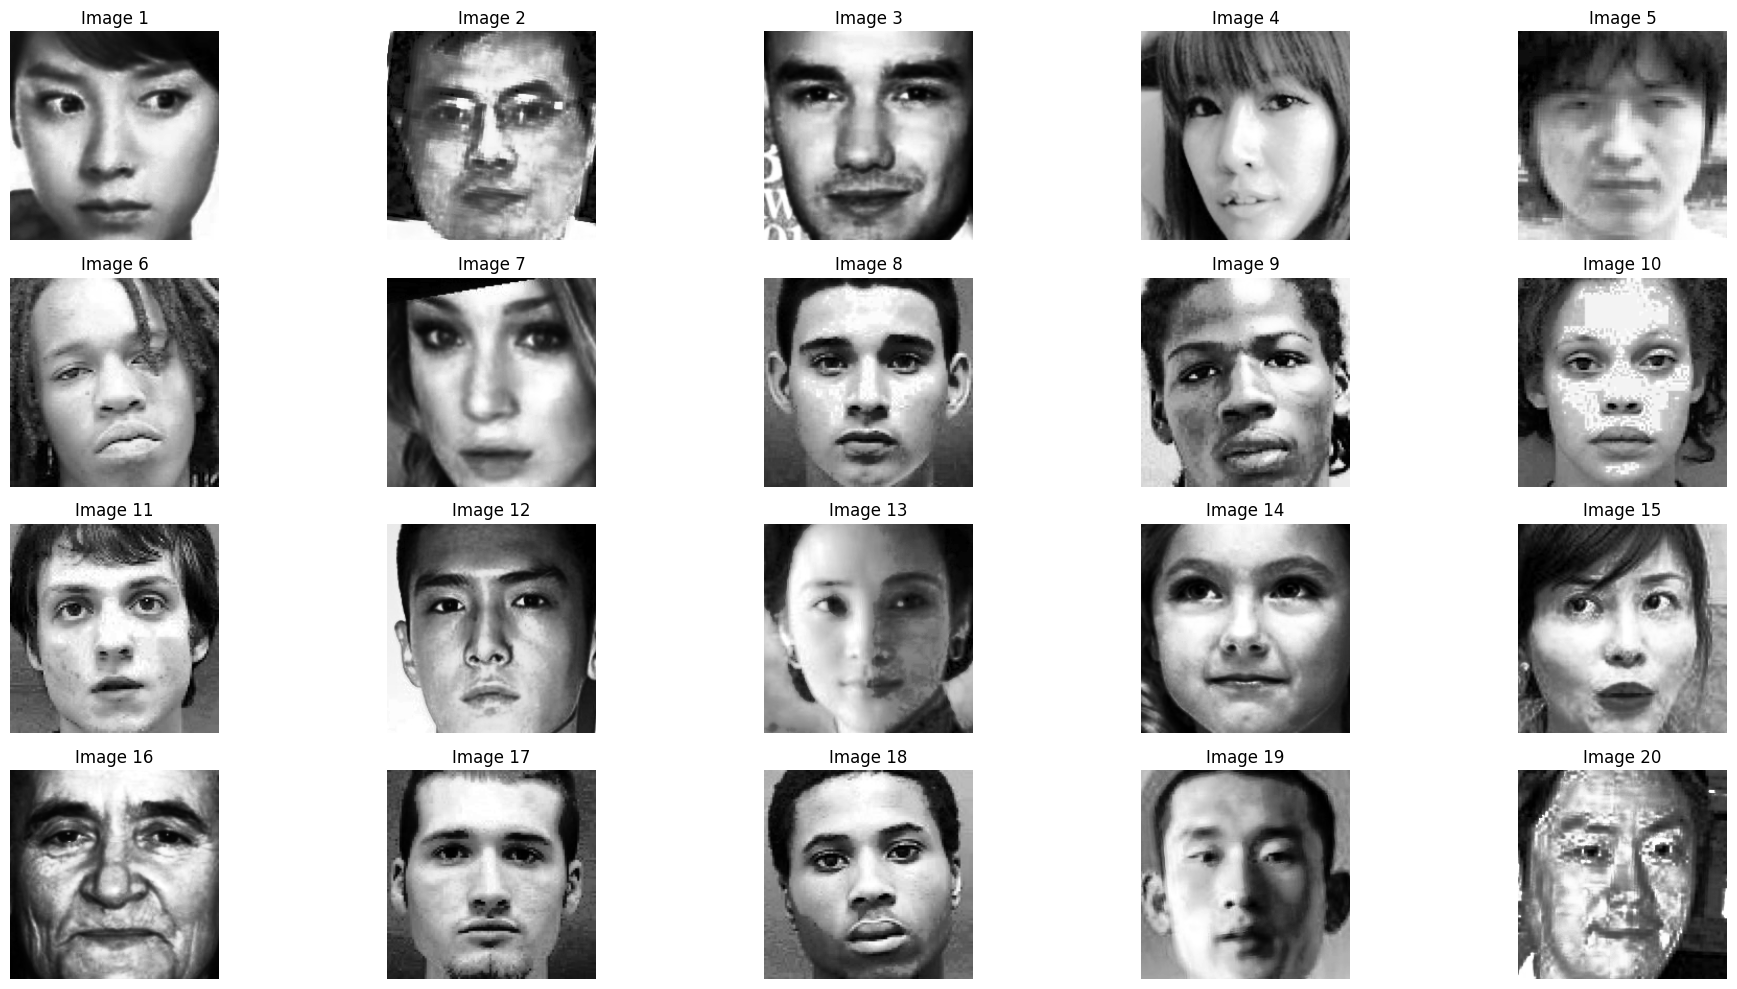

In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import random
from PIL import Image
import numpy as np
from skimage.color import rgb2gray
from skimage import exposure

# Load the DataFrame from a CSV file
df = pd.read_csv('/content/gdrive/MyDrive/PhD_Data/combined/Combined_dataset_utk_fgnet_morph_allface.csv')

# Folder containing the images
image_folder = '/content/gdrive/MyDrive/PhD_Data/combined/Combined_dataset/db_final_5000_viola'

# Get the list of image filenames from the DataFrame
image_filenames = df['filename'].tolist()

# Select 20 random images
random_images = random.sample(image_filenames, 20)

# Process and display the images
plt.figure(figsize=(20, 10))

for i, img_name in enumerate(random_images):
    img_path = os.path.join(image_folder, img_name)
    img = Image.open(img_path).convert('L')  # Convert to grayscale
    img_eq = exposure.equalize_hist(np.array(img))  # Apply histogram equalization

    plt.subplot(4, 5, i+1)
    plt.imshow(img_eq, cmap='gray')
    plt.title(f'Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
!pip install opencv-python


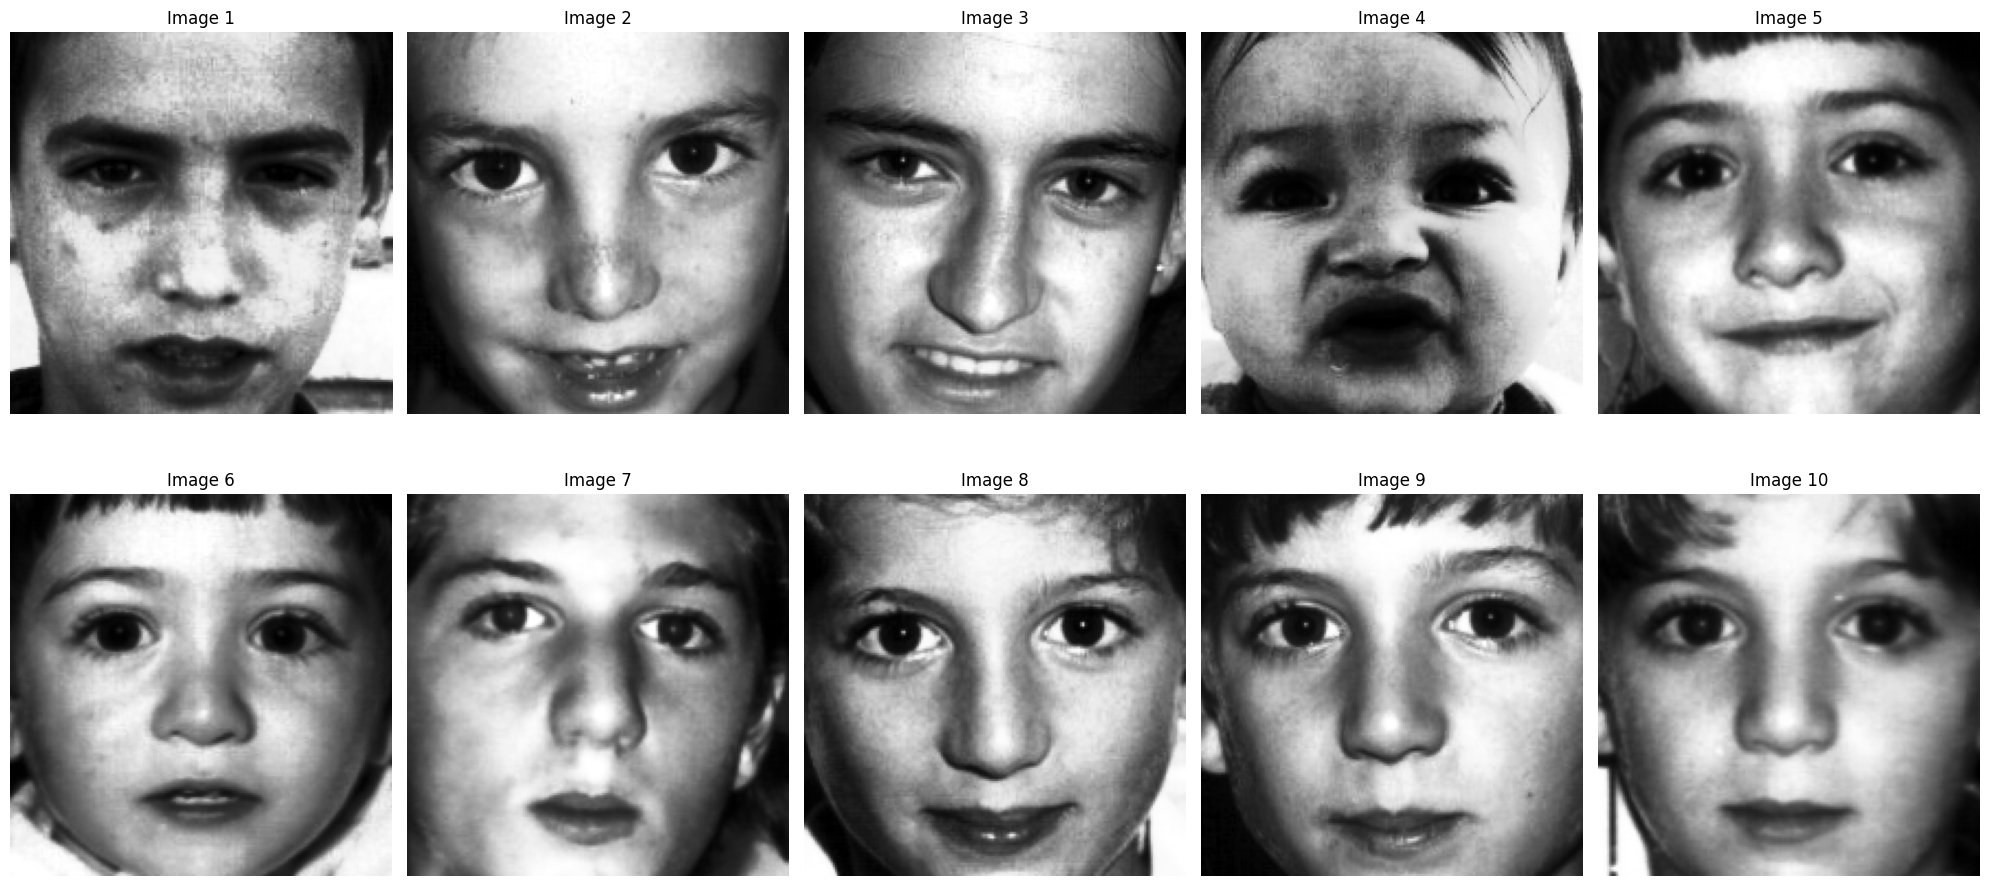

In [7]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from skimage import exposure
import cv2

# Load the DataFrame from a CSV file
df = pd.read_csv('/content/gdrive/MyDrive/PhD_Data/combined/Combined_dataset_utk_fgnet_morph_allface.csv')

# Folder containing the images
image_folder = '/content/gdrive/MyDrive/PhD_Data/combined/Combined_dataset/db_final_5000_viola'

# Select the first 10 images
first_10_images = df['filename'].iloc[:10].tolist()

# Initialize the face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Process and display the images
plt.figure(figsize=(20, 10))

for i, img_name in enumerate(first_10_images):
    img_path = os.path.join(image_folder, img_name)
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # If no face is detected, skip the image
    if len(faces) == 0:
        continue

    # Assume the first detected face is the target
    (x, y, w, h) = faces[0]

    # Crop the face region
    face_region = gray[y:y+h, x:x+w]

    # Apply histogram equalization
    face_eq = exposure.equalize_hist(face_region)

    plt.subplot(2, 5, i+1)
    plt.imshow(face_eq, cmap='gray')
    plt.title(f'Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


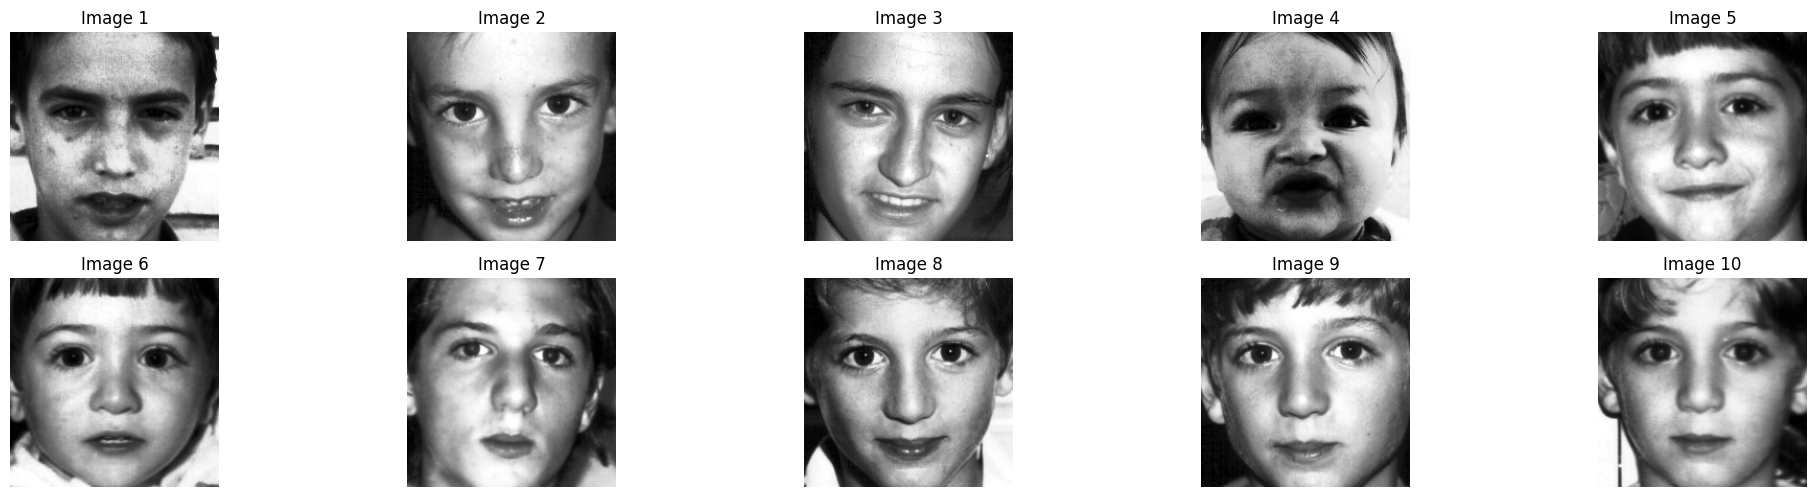

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from skimage import exposure
import cv2

# Load the DataFrame from a CSV file
df = pd.read_csv('/content/gdrive/MyDrive/PhD_Data/combined/Combined_dataset_utk_fgnet_morph_allface.csv')

# Folder containing the images
image_folder = '/content/gdrive/MyDrive/PhD_Data/combined/Combined_dataset/db_final_5000_viola'

# Select the first 20 images
first_20_images = df['filename'].iloc[:10].tolist()

# Process and display the images
plt.figure(figsize=(20, 10))

for i, img_name in enumerate(first_20_images):
    img_path = os.path.join(image_folder, img_name)
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply histogram equalization
    img_eq = exposure.equalize_hist(gray)

    plt.subplot(4, 5, i+1)
    plt.imshow(img_eq, cmap='gray')
    plt.title(f'Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


Feature extraction with stride 2

In [ ]:
import pandas as pd
import os
import numpy as np
from skimage import exposure
from skimage.feature import local_binary_pattern
import cv2
from IPython.display import display

# Load the DataFrame from a CSV file
df = pd.read_csv('/content/gdrive/MyDrive/PhD_Data/combined/Combined_dataset_utk_fgnet_morph_allface.csv')

# Folder containing the images
image_folder = '/content/gdrive/MyDrive/PhD_Data/combined/Combined_dataset/db_final_5000_viola'

# Get all image filenames
all_images = df['filename'].tolist()

# LBP parameters
radius = 3
n_points = 8 * radius
method = 'uniform'

# Function to extract LBP with a stride
def local_binary_pattern_with_stride(image, n_points, radius, stride=2, method='uniform'):
    height, width = image.shape
    lbp_image = np.zeros((height // stride, width // stride), dtype=np.float32)

    for i in range(0, height, stride):
        for j in range(0, width, stride):
            if i + radius < height and j + radius < width:
                patch = image[i:i + 2*radius + 1, j:j + 2*radius + 1]
                lbp_value = local_binary_pattern(patch, n_points, radius, method)
                lbp_image[i // stride, j // stride] = lbp_value[radius, radius]

    return lbp_image

# Process and collect LBP features and filenames
lbp_features = []
filenames = []

for img_name in all_images:
    img_path = os.path.join(image_folder, img_name)
    img = cv2.imread(img_path)
    if img is not None:
        # Resize image to 128x128
        img_resized = cv2.resize(img, (128, 128))

        gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

        # Apply histogram equalization
        img_eq = exposure.equalize_hist(gray)

        # Extract LBP features with stride
        lbp = local_binary_pattern_with_stride(img_eq, n_points, radius, stride=2, method=method)
        lbp_features.append(lbp.flatten())

        # Add the filename
        filenames.append(img_name)
    else:
        print(f"Image {img_name} could not be read.")

# Create a DataFrame for the LBP features
lbp_df = pd.DataFrame(lbp_features)
lbp_df['filename'] = filenames

# Display the DataFrame
display(lbp_df)

print(lbp_df)


Image 15_0_3_20170104225906465.jpg.chip.jpg could not be read.


0     1     2     3     4     5     6     7     8     9  ...  4087  \
0       9.0  25.0  25.0   6.0  25.0   2.0  18.0  18.0   9.0  12.0  ...   0.0   
1      15.0  12.0   8.0  10.0  12.0  13.0  12.0  25.0  25.0  25.0  ...   0.0   
2      25.0  25.0  25.0  24.0  22.0  25.0  25.0  25.0  13.0  10.0  ...   0.0   
3      25.0   1.0  25.0  25.0  23.0  12.0  11.0  12.0  25.0   0.0  ...   0.0   
4      25.0  21.0   1.0   4.0  10.0  25.0  24.0  25.0  12.0  11.0  ...   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
12208   9.0  25.0  24.0  25.0  25.0  25.0  25.0  25.0  20.0  14.0  ...   0.0   
12209   1.0  11.0  25.0  25.0  17.0  25.0  25.0  25.0  25.0  13.0  ...   0.0   
12210  25.0  17.0  25.0   0.0  21.0  10.0   1.0   0.0  16.0  25.0  ...   0.0   
12211   7.0  25.0  25.0  12.0  12.0  25.0  25.0  24.0  19.0  25.0  ...   0.0   
12212  25.0  25.0  25.0  18.0  12.0  10.0  10.0  25.0  23.0  25.0  ...   0.0   

       4088  4089  4090  4091  4092  4093  4094  4095          filename  
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      078A12_1.JPG  
1       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      078A05_1.JPG  
2       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      077A15_0.JPG  
3       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      076A01_0.JPG  
4       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      075A06_1.JPG  
...     ...   ...   ...   ...   ...   ...   ...   ...               ...  
12208   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  282278_04M20.JPG  
12209   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  326393_02M19.JPG  
12210   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  326759_03M18.JPG  
12211   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  330586_03M16.JPG  
12212   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  279966_01M20.JPG  

[12213 rows x 4097 columns]

          0     1     2     3     4     5     6     7     8     9  ...  4087  \
0       9.0  25.0  25.0   6.0  25.0   2.0  18.0  18.0   9.0  12.0  ...   0.0   
1      15.0  12.0   8.0  10.0  12.0  13.0  12.0  25.0  25.0  25.0  ...   0.0   
2      25.0  25.0  25.0  24.0  22.0  25.0  25.0  25.0  13.0  10.0  ...   0.0   
3      25.0   1.0  25.0  25.0  23.0  12.0  11.0  12.0  25.0   0.0  ...   0.0   
4      25.0  21.0   1.0   4.0  10.0  25.0  24.0  25.0  12.0  11.0  ...   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
12208   9.0  25.0  24.0  25.0  25.0  25.0  25.0  25.0  20.0  14.0  ...   0.0   
12209   1.0  11.0  25.0  25.0  17.0  25.0  25.0  25.0  25.0  13.0  ...   0.0   
12210  25.0  17.0  25.0   0.0  21.0  10.0   1.0   0.0  16.0  25.0  ...   0.0   
12211   7.0  25.0  25.0  12.0  12.0  25.0  25.0  24.0  19.0  25.0  ...   0.0   
12212  25.0  25.0  25.0  18.0  12.0  10.0  10.0  25.0  23.0  25.0  ...   0.0   

       4088  4089  4090  4091  4092  40

In [ ]:
lbp_df

0     1     2     3     4     5     6     7     8     9  ...  4087  \
0       9.0  25.0  25.0   6.0  25.0   2.0  18.0  18.0   9.0  12.0  ...   0.0   
1      15.0  12.0   8.0  10.0  12.0  13.0  12.0  25.0  25.0  25.0  ...   0.0   
2      25.0  25.0  25.0  24.0  22.0  25.0  25.0  25.0  13.0  10.0  ...   0.0   
3      25.0   1.0  25.0  25.0  23.0  12.0  11.0  12.0  25.0   0.0  ...   0.0   
4      25.0  21.0   1.0   4.0  10.0  25.0  24.0  25.0  12.0  11.0  ...   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
12208   9.0  25.0  24.0  25.0  25.0  25.0  25.0  25.0  20.0  14.0  ...   0.0   
12209   1.0  11.0  25.0  25.0  17.0  25.0  25.0  25.0  25.0  13.0  ...   0.0   
12210  25.0  17.0  25.0   0.0  21.0  10.0   1.0   0.0  16.0  25.0  ...   0.0   
12211   7.0  25.0  25.0  12.0  12.0  25.0  25.0  24.0  19.0  25.0  ...   0.0   
12212  25.0  25.0  25.0  18.0  12.0  10.0  10.0  25.0  23.0  25.0  ...   0.0   

       4088  4089  4090  4091  4092  4093  4094  4095          filename  
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      078A12_1.JPG  
1       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      078A05_1.JPG  
2       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      077A15_0.JPG  
3       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      076A01_0.JPG  
4       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      075A06_1.JPG  
...     ...   ...   ...   ...   ...   ...   ...   ...               ...  
12208   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  282278_04M20.JPG  
12209   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  326393_02M19.JPG  
12210   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  326759_03M18.JPG  
12211   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  330586_03M16.JPG  
12212   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  279966_01M20.JPG  

[12213 rows x 4097 columns]

In [3]:
import pandas as pd

# Path to the CSV file
csv_file_path = '/content/gdrive/MyDrive/PhD_Data/combined/Feature_extraction/lbp_features_stride.csv'

# Read the DataFrame from the CSV file
lbp_df = pd.read_csv(csv_file_path)

# Display the DataFrame
from IPython.display import display
display(lbp_df)

print(lbp_df)


0     1     2     3     4     5     6     7     8     9  ...  4087  \
0       9.0  25.0  25.0   6.0  25.0   2.0  18.0  18.0   9.0  12.0  ...   0.0   
1      15.0  12.0   8.0  10.0  12.0  13.0  12.0  25.0  25.0  25.0  ...   0.0   
2      25.0  25.0  25.0  24.0  22.0  25.0  25.0  25.0  13.0  10.0  ...   0.0   
3      25.0   1.0  25.0  25.0  23.0  12.0  11.0  12.0  25.0   0.0  ...   0.0   
4      25.0  21.0   1.0   4.0  10.0  25.0  24.0  25.0  12.0  11.0  ...   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
12208   9.0  25.0  24.0  25.0  25.0  25.0  25.0  25.0  20.0  14.0  ...   0.0   
12209   1.0  11.0  25.0  25.0  17.0  25.0  25.0  25.0  25.0  13.0  ...   0.0   
12210  25.0  17.0  25.0   0.0  21.0  10.0   1.0   0.0  16.0  25.0  ...   0.0   
12211   7.0  25.0  25.0  12.0  12.0  25.0  25.0  24.0  19.0  25.0  ...   0.0   
12212  25.0  25.0  25.0  18.0  12.0  10.0  10.0  25.0  23.0  25.0  ...   0.0   

       4088  4089  4090  4091  4092  4093  4094  4095          filename  
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      078A12_1.JPG  
1       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      078A05_1.JPG  
2       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      077A15_0.JPG  
3       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      076A01_0.JPG  
4       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      075A06_1.JPG  
...     ...   ...   ...   ...   ...   ...   ...   ...               ...  
12208   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  282278_04M20.JPG  
12209   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  326393_02M19.JPG  
12210   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  326759_03M18.JPG  
12211   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  330586_03M16.JPG  
12212   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  279966_01M20.JPG  

[12213 rows x 4097 columns]

          0     1     2     3     4     5     6     7     8     9  ...  4087  \
0       9.0  25.0  25.0   6.0  25.0   2.0  18.0  18.0   9.0  12.0  ...   0.0   
1      15.0  12.0   8.0  10.0  12.0  13.0  12.0  25.0  25.0  25.0  ...   0.0   
2      25.0  25.0  25.0  24.0  22.0  25.0  25.0  25.0  13.0  10.0  ...   0.0   
3      25.0   1.0  25.0  25.0  23.0  12.0  11.0  12.0  25.0   0.0  ...   0.0   
4      25.0  21.0   1.0   4.0  10.0  25.0  24.0  25.0  12.0  11.0  ...   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
12208   9.0  25.0  24.0  25.0  25.0  25.0  25.0  25.0  20.0  14.0  ...   0.0   
12209   1.0  11.0  25.0  25.0  17.0  25.0  25.0  25.0  25.0  13.0  ...   0.0   
12210  25.0  17.0  25.0   0.0  21.0  10.0   1.0   0.0  16.0  25.0  ...   0.0   
12211   7.0  25.0  25.0  12.0  12.0  25.0  25.0  24.0  19.0  25.0  ...   0.0   
12212  25.0  25.0  25.0  18.0  12.0  10.0  10.0  25.0  23.0  25.0  ...   0.0   

       4088  4089  4090  4091  4092  40

chi-square for stride 2

In [8]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Assuming lbp_df already exists and has the LBP features and filenames

# Add age information to lbp_df
ages = []
for filename in lbp_df['filename']:
    age = df[df['filename'] == filename]['age'].values[0]
    ages.append(age)
lbp_df['age'] = ages

# Define age bins for 10-year intervals
bins = range(0, 101, 10)  # from 0 to 100, with intervals of 10
labels = [f'{i}-{i+9}' for i in bins[:-1]]
lbp_df['age_group'] = pd.cut(lbp_df['age'], bins=bins, labels=labels)

# Prepare to store Chi-Square results
chi2_results = []
p_values = []
features = []

# Perform Chi-Square test for each feature across age groups
for i in range(lbp_df.shape[1] - 3):  # Exclude 'age', 'filename', and 'age_group' columns
    feature_column = lbp_df.columns[i]
    contingency_table = pd.crosstab(lbp_df['age_group'], lbp_df[feature_column])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results.append(chi2)
    p_values.append(p)
    features.append(feature_column)

# Create a DataFrame for Chi-Square results
results_df = pd.DataFrame({
    'Feature': features,
    'Chi2': chi2_results,
    'p-value': p_values
})

# Display the results
from IPython.display import display
display(results_df)

print(results_df)

<ipython-input-8-d41eddcc7310>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contingency_table = pd.crosstab(lbp_df['age_group'], lbp_df[feature_column])


Feature        Chi2       p-value
0          0  684.307208  7.417041e-48
1          1  614.060914  8.006755e-38
2          2  623.019335  4.529090e-39
3          3  597.666654  1.444661e-35
4          4  564.143309  4.564284e-31
...      ...         ...           ...
4091    4091    0.000000  1.000000e+00
4092    4092    0.000000  1.000000e+00
4093    4093    0.000000  1.000000e+00
4094    4094    0.000000  1.000000e+00
4095    4095    0.000000  1.000000e+00

[4096 rows x 3 columns]

     Feature        Chi2       p-value
0          0  684.307208  7.417041e-48
1          1  614.060914  8.006755e-38
2          2  623.019335  4.529090e-39
3          3  597.666654  1.444661e-35
4          4  564.143309  4.564284e-31
...      ...         ...           ...
4091    4091    0.000000  1.000000e+00
4092    4092    0.000000  1.000000e+00
4093    4093    0.000000  1.000000e+00
4094    4094    0.000000  1.000000e+00
4095    4095    0.000000  1.000000e+00

[4096 rows x 3 columns]


In [9]:
results_df

Feature        Chi2       p-value
0          0  684.307208  7.417041e-48
1          1  614.060914  8.006755e-38
2          2  623.019335  4.529090e-39
3          3  597.666654  1.444661e-35
4          4  564.143309  4.564284e-31
...      ...         ...           ...
4091    4091    0.000000  1.000000e+00
4092    4092    0.000000  1.000000e+00
4093    4093    0.000000  1.000000e+00
4094    4094    0.000000  1.000000e+00
4095    4095    0.000000  1.000000e+00

[4096 rows x 3 columns]

Finding significant features

In [11]:
import pandas as pd
import numpy as np

# Load the DataFrames if they are not already defined
# results_df = pd.read_csv('path_to_results_df.csv')
# lbp_df = pd.read_csv('path_to_lbp_df.csv')

# Assuming significant_features and lbp_df are already defined

# Identify significant features (p-value < 0.05)
significant_features = results_df[results_df['p-value'] < 0.01]

# Display significant features
display(significant_features)
print(significant_features)

# Convert 'Feature' column to int and get indices
significant_feature_indices = significant_features['Feature'].astype(int).tolist()

# Ensure indices are within the correct range
max_index = lbp_df.shape[1] - 1  # Last column index
significant_feature_indices = [idx for idx in significant_feature_indices if idx <= max_index]

# Filter lbp_df to include only significant features
significant_lbp_df = lbp_df.iloc[:, significant_feature_indices]

# Add age group information if it's not already included
if 'age_group' not in lbp_df.columns:
    # Ensure you have a column 'age_group' in your lbp_df
    # lbp_df['age_group'] = <Your logic to assign age groups>
    pass

significant_lbp_df['age_group'] = lbp_df['age_group']

# Save the significant features with age group information to a new DataFrame
output_df = significant_lbp_df.copy()

# Save the DataFrame to a CSV file
output_csv_path = '/content/gdrive/MyDrive/PhD_Data/combined/significant_lbp_features_with_age_group.csv'
output_df.to_csv(output_csv_path, index=False)

# Display the new DataFrame
display(output_df)
print(output_df)


Feature        Chi2       p-value
0          0  684.307208  7.417041e-48
1          1  614.060914  8.006755e-38
2          2  623.019335  4.529090e-39
3          3  597.666654  1.444661e-35
4          4  564.143309  4.564284e-31
...      ...         ...           ...
4026    4026  318.722722  3.034657e-15
4027    4027  364.282059  4.661859e-21
4028    4028  412.821734  9.009166e-28
4029    4029  372.159191  3.840415e-26
4030    4030  203.446355  9.220305e-11

[3969 rows x 3 columns]

     Feature        Chi2       p-value
0          0  684.307208  7.417041e-48
1          1  614.060914  8.006755e-38
2          2  623.019335  4.529090e-39
3          3  597.666654  1.444661e-35
4          4  564.143309  4.564284e-31
...      ...         ...           ...
4026    4026  318.722722  3.034657e-15
4027    4027  364.282059  4.661859e-21
4028    4028  412.821734  9.009166e-28
4029    4029  372.159191  3.840415e-26
4030    4030  203.446355  9.220305e-11

[3969 rows x 3 columns]


<ipython-input-11-8715944bf921>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  significant_lbp_df['age_group'] = lbp_df['age_group']


0     1     2     3     4     5     6     7     8     9  ...  4022  \
0       9.0  25.0  25.0   6.0  25.0   2.0  18.0  18.0   9.0  12.0  ...  12.0   
1      15.0  12.0   8.0  10.0  12.0  13.0  12.0  25.0  25.0  25.0  ...   6.0   
2      25.0  25.0  25.0  24.0  22.0  25.0  25.0  25.0  13.0  10.0  ...  13.0   
3      25.0   1.0  25.0  25.0  23.0  12.0  11.0  12.0  25.0   0.0  ...   3.0   
4      25.0  21.0   1.0   4.0  10.0  25.0  24.0  25.0  12.0  11.0  ...   1.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
12208   9.0  25.0  24.0  25.0  25.0  25.0  25.0  25.0  20.0  14.0  ...   0.0   
12209   1.0  11.0  25.0  25.0  17.0  25.0  25.0  25.0  25.0  13.0  ...  25.0   
12210  25.0  17.0  25.0   0.0  21.0  10.0   1.0   0.0  16.0  25.0  ...  13.0   
12211   7.0  25.0  25.0  12.0  12.0  25.0  25.0  24.0  19.0  25.0  ...   5.0   
12212  25.0  25.0  25.0  18.0  12.0  10.0  10.0  25.0  23.0  25.0  ...   1.0   

       4023  4024  4025  4026  4027  4028  4029  4030  age_group  
0      25.0  25.0  25.0  25.0  25.0  25.0   0.0   0.0      10-19  
1       8.0  25.0  25.0   4.0  25.0   9.0  25.0   3.0        0-9  
2      11.0  12.0  12.0  12.0  11.0  11.0   9.0   7.0      10-19  
3      25.0  14.0   7.0   7.0   8.0   9.0  25.0   0.0        0-9  
4       4.0   6.0   6.0   7.0   6.0   6.0   6.0   5.0        0-9  
...     ...   ...   ...   ...   ...   ...   ...   ...        ...  
12208   1.0   8.0   9.0  10.0  10.0  13.0   5.0   1.0      10-19  
12209   6.0   6.0   8.0   8.0   6.0   5.0   6.0   0.0      10-19  
12210  25.0   1.0  10.0   2.0   0.0  25.0   7.0  25.0      10-19  
12211   5.0  25.0   0.0   5.0   3.0  25.0   3.0   0.0      10-19  
12212  11.0  13.0  13.0  12.0  12.0  11.0   6.0   0.0      10-19  

[12213 rows x 3970 columns]

          0     1     2     3     4     5     6     7     8     9  ...  4022  \
0       9.0  25.0  25.0   6.0  25.0   2.0  18.0  18.0   9.0  12.0  ...  12.0   
1      15.0  12.0   8.0  10.0  12.0  13.0  12.0  25.0  25.0  25.0  ...   6.0   
2      25.0  25.0  25.0  24.0  22.0  25.0  25.0  25.0  13.0  10.0  ...  13.0   
3      25.0   1.0  25.0  25.0  23.0  12.0  11.0  12.0  25.0   0.0  ...   3.0   
4      25.0  21.0   1.0   4.0  10.0  25.0  24.0  25.0  12.0  11.0  ...   1.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
12208   9.0  25.0  24.0  25.0  25.0  25.0  25.0  25.0  20.0  14.0  ...   0.0   
12209   1.0  11.0  25.0  25.0  17.0  25.0  25.0  25.0  25.0  13.0  ...  25.0   
12210  25.0  17.0  25.0   0.0  21.0  10.0   1.0   0.0  16.0  25.0  ...  13.0   
12211   7.0  25.0  25.0  12.0  12.0  25.0  25.0  24.0  19.0  25.0  ...   5.0   
12212  25.0  25.0  25.0  18.0  12.0  10.0  10.0  25.0  23.0  25.0  ...   1.0   

       4023  4024  4025  4026  4027  40

from matplotlib import pyplot as plt
significant_features['Chi2'].plot(kind='hist', bins=20, title='Chi2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
significant_features['p-value'].plot(kind='hist', bins=20, title='p-value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
significant_features.plot(kind='scatter', x='Chi2', y='p-value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
significant_features['Chi2'].plot(kind='line', figsize=(8, 4), title='Chi2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
significant_features['p-value'].plot(kind='line', figsize=(8, 4), title='p-value')
plt.gca().spines[['top', 'right']].set_visible(False)

In [14]:
significant_features

Feature        Chi2       p-value
0          0  684.307208  7.417041e-48
1          1  614.060914  8.006755e-38
2          2  623.019335  4.529090e-39
3          3  597.666654  1.444661e-35
4          4  564.143309  4.564284e-31
...      ...         ...           ...
4026    4026  318.722722  3.034657e-15
4027    4027  364.282059  4.661859e-21
4028    4028  412.821734  9.009166e-28
4029    4029  372.159191  3.840415e-26
4030    4030  203.446355  9.220305e-11

[3969 rows x 3 columns]

Pvalue plot

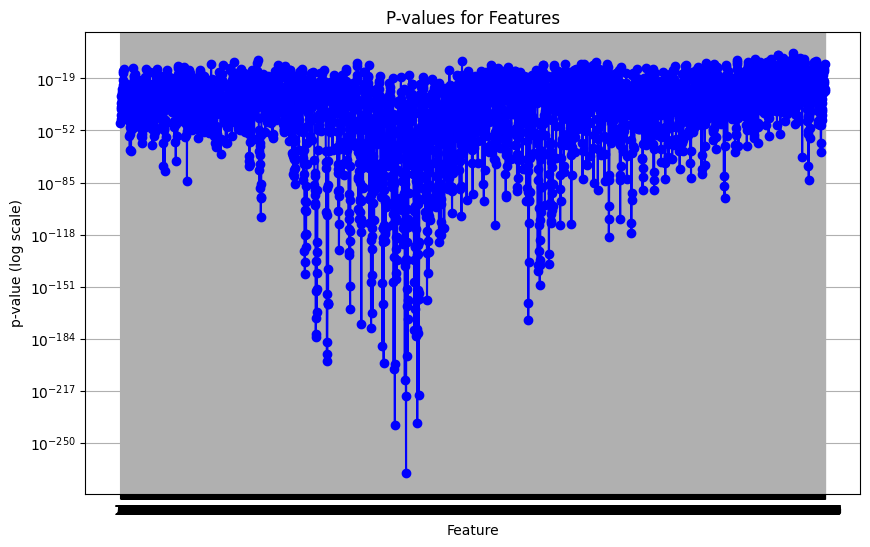

In [15]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named results_df and has 'Feature' and 'p-value' columns
# Plotting the p-values
plt.figure(figsize=(10, 6))
plt.plot(significant_features['Feature'], significant_features['p-value'], marker='o', linestyle='-', color='b')
plt.yscale('log')
plt.xlabel('Feature')
plt.ylabel('p-value (log scale)')
plt.title('P-values for Features')
plt.grid(True)
plt.show()


In [2]:
# Save the DataFrame to a CSV file
output_csv_path = '/content/gdrive/MyDrive/PhD_Data/combined/Feature_extraction/lbp_features.csv'
lbp_df.to_csv(output_csv_path, index=False)

NameError: name 'lbp_df' is not defined

In [ ]:
import pandas as pd

# Path to the CSV file
csv_file_path = '/content/gdrive/MyDrive/PhD_Data/combined/Feature_extraction/lbp_features.csv'

# Read the DataFrame from the CSV file
lbp_df = pd.read_csv(csv_file_path)

# Display the DataFrame
from IPython.display import display
display(lbp_df)

print(lbp_df)


0     1     2     3     4     5     6     7     8     9  ...  16375  \
0       1.0  10.0  13.0  15.0  25.0   0.0   2.0  25.0  25.0   3.0  ...   25.0   
1       7.0   7.0   8.0   5.0  25.0   7.0   7.0   8.0   9.0   9.0  ...    4.0   
2       1.0   9.0  12.0  25.0  25.0   5.0  25.0  25.0  25.0   0.0  ...   12.0   
3       7.0  25.0   9.0   7.0  25.0  14.0   9.0   0.0  25.0  25.0  ...    7.0   
4       2.0   2.0  25.0  13.0  13.0  25.0   4.0   4.0  11.0  11.0  ...    7.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
12208  25.0   0.0   0.0   4.0   6.0   5.0   5.0   4.0  25.0  25.0  ...   10.0   
12209  25.0  25.0   2.0  25.0   0.0   6.0  25.0  25.0  25.0   1.0  ...    8.0   
12210   6.0  25.0   0.0   1.0  25.0   3.0   1.0  25.0  13.0  25.0  ...    2.0   
12211   0.0   0.0   0.0   6.0   8.0   6.0   1.0   5.0  13.0  15.0  ...    5.0   
12212   0.0   1.0   3.0  13.0  25.0  25.0  25.0  25.0  25.0   1.0  ...   12.0   

       16376  16377  16378  16379  16380  16381  16382  16383  \
0       25.0   25.0   13.0   25.0   25.0    0.0    0.0    0.0   
1        6.0   25.0   25.0    9.0   11.0   25.0    2.0    3.0   
2       12.0   11.0   10.0   11.0   11.0    9.0    8.0    7.0   
3        8.0    8.0    8.0    9.0    9.0   25.0   25.0    0.0   
4        7.0    6.0    6.0    6.0    5.0    6.0    6.0    5.0   
...      ...    ...    ...    ...    ...    ...    ...    ...   
12208    9.0   10.0   13.0   13.0   25.0    5.0    1.0    1.0   
12209    7.0    6.0    6.0    5.0    8.0    6.0    2.0    0.0   
12210    0.0    0.0    0.0   25.0   25.0    7.0   25.0   25.0   
12211    4.0    3.0   25.0   25.0   25.0    3.0    0.0    0.0   
12212   12.0   12.0   12.0   11.0   11.0    6.0    0.0    0.0   

               filename  
0          078A12_1.JPG  
1          078A05_1.JPG  
2          077A15_0.JPG  
3          076A01_0.JPG  
4          075A06_1.JPG  
...                 ...  
12208  282278_04M20.JPG  
12209  326393_02M19.JPG  
12210  326759_03M18.JPG  
12211  330586_03M16.JPG  
12212  279966_01M20.JPG  

[12213 rows x 16385 columns]

          0     1     2     3     4     5     6     7     8     9  ...  16375  \
0       1.0  10.0  13.0  15.0  25.0   0.0   2.0  25.0  25.0   3.0  ...   25.0   
1       7.0   7.0   8.0   5.0  25.0   7.0   7.0   8.0   9.0   9.0  ...    4.0   
2       1.0   9.0  12.0  25.0  25.0   5.0  25.0  25.0  25.0   0.0  ...   12.0   
3       7.0  25.0   9.0   7.0  25.0  14.0   9.0   0.0  25.0  25.0  ...    7.0   
4       2.0   2.0  25.0  13.0  13.0  25.0   4.0   4.0  11.0  11.0  ...    7.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
12208  25.0   0.0   0.0   4.0   6.0   5.0   5.0   4.0  25.0  25.0  ...   10.0   
12209  25.0  25.0   2.0  25.0   0.0   6.0  25.0  25.0  25.0   1.0  ...    8.0   
12210   6.0  25.0   0.0   1.0  25.0   3.0   1.0  25.0  13.0  25.0  ...    2.0   
12211   0.0   0.0   0.0   6.0   8.0   6.0   1.0   5.0  13.0  15.0  ...    5.0   
12212   0.0   1.0   3.0  13.0  25.0  25.0  25.0  25.0  25.0   1.0  ...   12.0   

       16376  16377  16378 

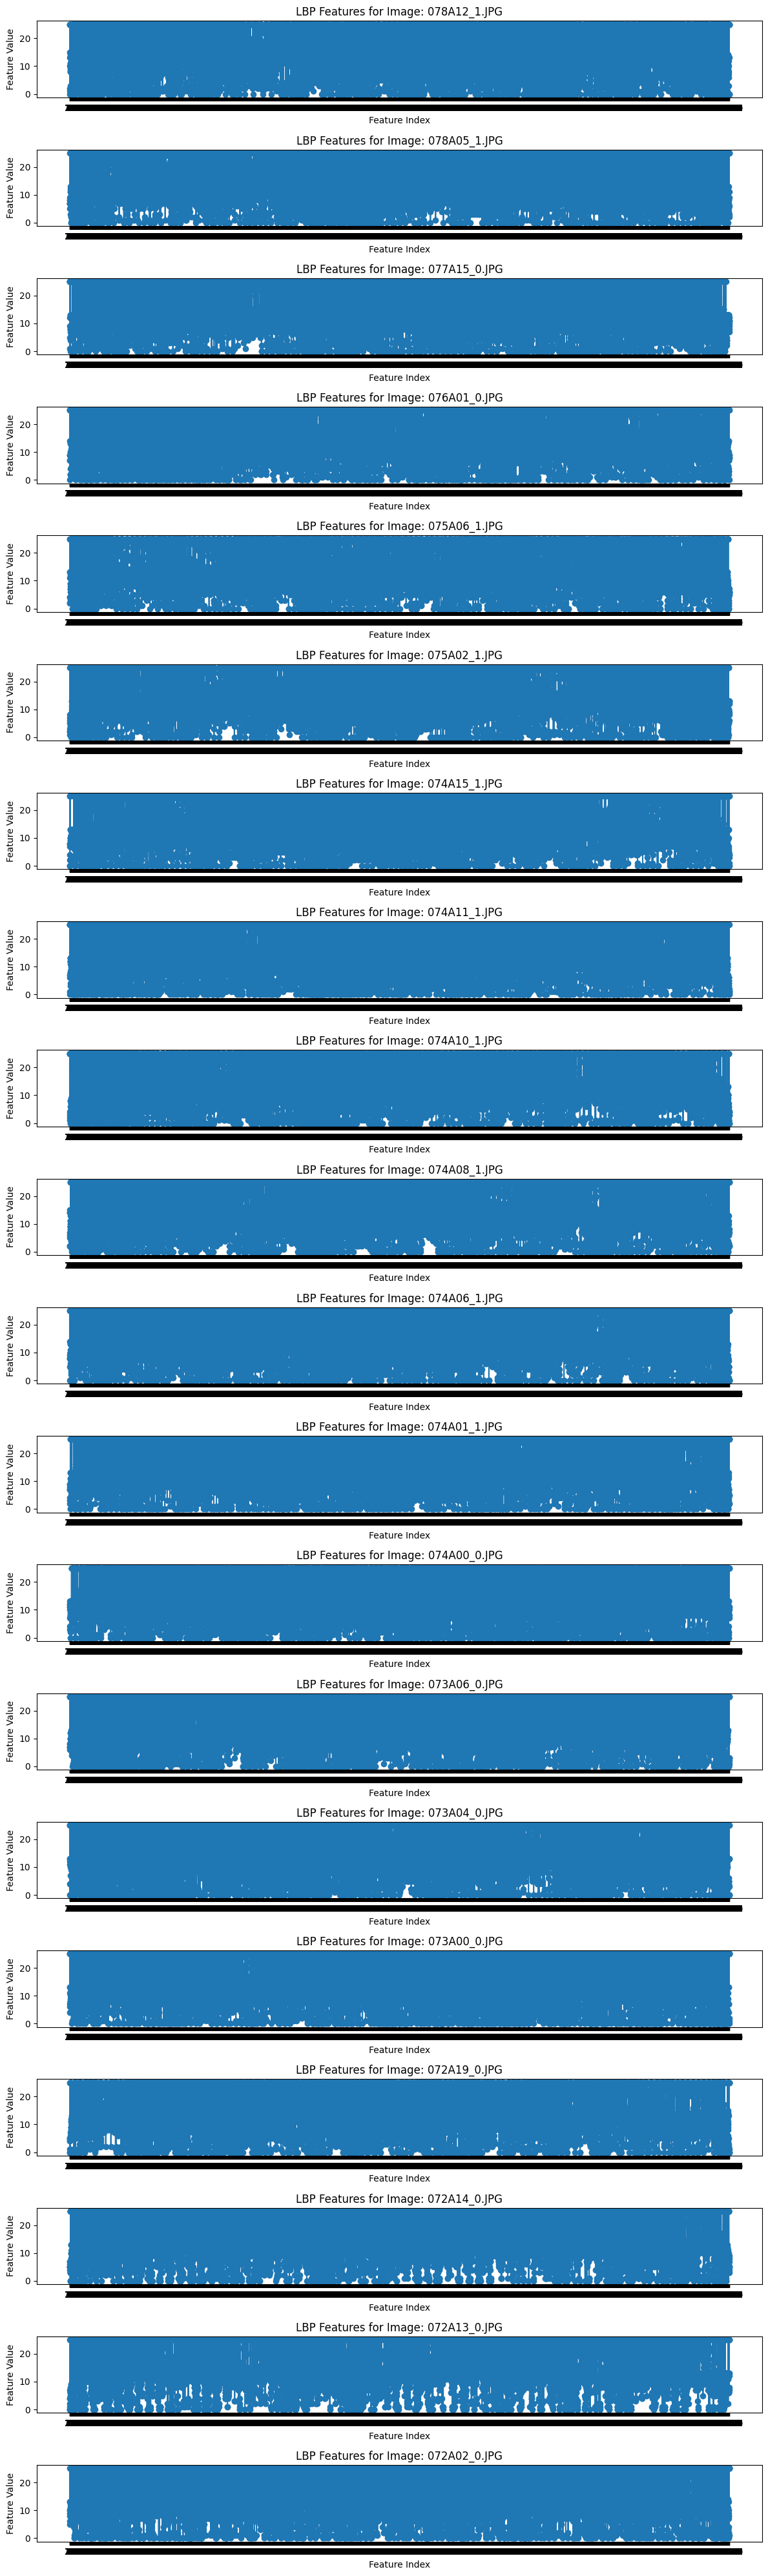

In [ ]:
# Extract the filenames and LBP features
filenames = lbp_df['filename']
lbp_features = lbp_df.drop(columns=['filename'])

# Define the number of images to plot
num_images_to_plot = 20  # Adjust this number based on how many images you want to plot

# Create subplots
fig, axes = plt.subplots(num_images_to_plot, 1, figsize=(12, 2 * num_images_to_plot))

# Plot LBP features for each image
for i in range(num_images_to_plot):
    axes[i].plot(lbp_features.iloc[i], marker='o')
    axes[i].set_title(f'LBP Features for Image: {filenames[i]}')
    axes[i].set_xlabel('Feature Index')
    axes[i].set_ylabel('Feature Value')

plt.tight_layout()
plt.show()

In [ ]:
df

filename  age  gender ethnicity
0          078A12_1.JPG   12       1         W
1          078A05_1.JPG    5       1         W
2          077A15_0.JPG   15       0         W
3          076A01_0.JPG    1       0         W
4          075A06_1.JPG    6       1         W
...                 ...  ...     ...       ...
12209  282278_04M20.JPG   20       1         B
12210  326393_02M19.JPG   19       1         W
12211  326759_03M18.JPG   18       1         W
12212  330586_03M16.JPG   16       1         W
12213  279966_01M20.JPG   20       1         B

[12214 rows x 4 columns]

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Assuming lbp_df already exists and has the LBP features and filenames

# Add age information to lbp_df
ages = []
for filename in lbp_df['filename']:
    age = df[df['filename'] == filename]['age'].values[0]
    ages.append(age)
lbp_df['age'] = ages

# Define age bins for 10-year intervals
bins = range(0, 101, 10)  # from 0 to 100, with intervals of 10
labels = [f'{i}-{i+9}' for i in bins[:-1]]
lbp_df['age_group'] = pd.cut(lbp_df['age'], bins=bins, labels=labels)

# Prepare to store Chi-Square results
chi2_results = []
p_values = []
features = []

# Perform Chi-Square test for each feature across age groups
for i in range(lbp_df.shape[1] - 3):  # Exclude 'age', 'filename', and 'age_group' columns
    feature_column = lbp_df.columns[i]
    contingency_table = pd.crosstab(lbp_df['age_group'], lbp_df[feature_column])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results.append(chi2)
    p_values.append(p)
    features.append(feature_column)

# Create a DataFrame for Chi-Square results
results_df = pd.DataFrame({
    'Feature': features,
    'Chi2': chi2_results,
    'p-value': p_values
})

# Display the results
from IPython.display import display
display(results_df)

print(results_df)

<ipython-input-11-d41eddcc7310>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contingency_table = pd.crosstab(lbp_df['age_group'], lbp_df[feature_column])
<ipython-input-11-d41eddcc7310>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contingency_table = pd.crosstab(lbp_df['age_group'], lbp_df[feature_column])
<ipython-input-11-d41eddcc7310>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

Feature        Chi2       p-value
0           0  193.287973  1.616396e-09
1           1  239.871393  1.058747e-13
2           2  371.696835  4.482996e-26
3           3  509.154810  2.904586e-42
4           4  656.986803  1.535173e-66
...       ...         ...           ...
16379   16379  412.821734  9.009166e-28
16380   16380  331.138322  8.954032e-17
16381   16381  372.159191  3.840415e-26
16382   16382  287.595275  2.747679e-20
16383   16383  203.446355  9.220305e-11

[16384 rows x 3 columns]

      Feature        Chi2       p-value
0           0  193.287973  1.616396e-09
1           1  239.871393  1.058747e-13
2           2  371.696835  4.482996e-26
3           3  509.154810  2.904586e-42
4           4  656.986803  1.535173e-66
...       ...         ...           ...
16379   16379  412.821734  9.009166e-28
16380   16380  331.138322  8.954032e-17
16381   16381  372.159191  3.840415e-26
16382   16382  287.595275  2.747679e-20
16383   16383  203.446355  9.220305e-11

[16384 rows x 3 columns]


In [ ]:
results_df

Feature        Chi2       p-value
0           0  193.287973  1.616396e-09
1           1  239.871393  1.058747e-13
2           2  371.696835  4.482996e-26
3           3  509.154810  2.904586e-42
4           4  656.986803  1.535173e-66
...       ...         ...           ...
16379   16379  412.821734  9.009166e-28
16380   16380  331.138322  8.954032e-17
16381   16381  372.159191  3.840415e-26
16382   16382  287.595275  2.747679e-20
16383   16383  203.446355  9.220305e-11

[16384 rows x 3 columns]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the DataFrames if they are not already defined
# results_df = pd.read_csv('path_to_results_df.csv')
# lbp_df = pd.read_csv('path_to_lbp_df.csv')

# Assuming significant_features and lbp_df are already defined

# Identify significant features (p-value < 0.05)
significant_features = results_df[results_df['p-value'] < 0.05]

# Display significant features
display(significant_features)
print(significant_features)

# Convert 'Feature' column to int and get indices
significant_feature_indices = significant_features['Feature'].astype(int).tolist()

# Ensure indices are within the correct range
max_index = lbp_df.shape[1] - 1  # Last column index
significant_feature_indices = [idx for idx in significant_feature_indices if idx <= max_index]

# Filter lbp_df to include only significant features
significant_lbp_df = lbp_df.iloc[:, significant_feature_indices]

# Add age group information if it's not already included
if 'age_group' not in lbp_df.columns:
    # Ensure you have a column 'age_group' in your lbp_df
    # lbp_df['age_group'] = <Your logic to assign age groups>
    pass

significant_lbp_df['age_group'] = lbp_df['age_group']

# Determine the number of subplots needed
num_significant_features = len(significant_feature_indices)
num_cols = 5
num_rows = (num_significant_features + num_cols - 1) // num_cols

# Plot histograms for significant features
plt.figure(figsize=(20, num_rows * 5))
for i, feature in enumerate(significant_feature_indices):
    plt.subplot(num_rows, num_cols, i + 1)
    for label in significant_lbp_df['age_group'].unique():
        subset = significant_lbp_df[significant_lbp_df['age_group'] == label]
        plt.hist(subset.iloc[:, i], bins=26, alpha=0.5, label=str(label))
    plt.title(f'Feature {feature}')
    plt.xlabel('LBP Value')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

# Calculate the correlation matrix
correlation_matrix = significant_lbp_df.drop(columns=['age_group']).corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size to a reasonable limit
plt.matshow(correlation_matrix, fignum=1)
plt.xticks(range(correlation_matrix.shape[1]), correlation_matrix.columns, rotation=90)
plt.yticks(range(correlation_matrix.shape[0]), correlation_matrix.index)
plt.colorbar()
plt.show()

# Identify pairs of features with high correlation
threshold = 0.8  # Define a threshold for high correlation
high_correlation_pairs = []

for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_correlation_pairs.append((correlation_matrix.index[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Display pairs of features with high correlation
print("Highly correlated feature pairs (correlation > 0.8 or < -0.8):")
for pair in high_correlation_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")

# Save the significant features with age group information to a new DataFrame
output_df = significant_lbp_df.copy()


# Display the new DataFrame
display(output_df)
print(output_df)


Feature        Chi2       p-value
0           0  193.287973  1.616396e-09
1           1  239.871393  1.058747e-13
2           2  371.696835  4.482996e-26
3           3  509.154810  2.904586e-42
4           4  656.986803  1.535173e-66
...       ...         ...           ...
16379   16379  412.821734  9.009166e-28
16380   16380  331.138322  8.954032e-17
16381   16381  372.159191  3.840415e-26
16382   16382  287.595275  2.747679e-20
16383   16383  203.446355  9.220305e-11

[16384 rows x 3 columns]

      Feature        Chi2       p-value
0           0  193.287973  1.616396e-09
1           1  239.871393  1.058747e-13
2           2  371.696835  4.482996e-26
3           3  509.154810  2.904586e-42
4           4  656.986803  1.535173e-66
...       ...         ...           ...
16379   16379  412.821734  9.009166e-28
16380   16380  331.138322  8.954032e-17
16381   16381  372.159191  3.840415e-26
16382   16382  287.595275  2.747679e-20
16383   16383  203.446355  9.220305e-11

[16384 rows x 3 columns]


<ipython-input-13-e68d90cc6b5f>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  significant_lbp_df['age_group'] = lbp_df['age_group']


finding the significant features

In [ ]:
import pandas as pd
import numpy as np

# Load the DataFrames if they are not already defined
# results_df = pd.read_csv('path_to_results_df.csv')
# lbp_df = pd.read_csv('path_to_lbp_df.csv')

# Assuming significant_features and lbp_df are already defined

# Identify significant features (p-value < 0.05)
significant_features = results_df[results_df['p-value'] < 0.01]

# Display significant features
display(significant_features)
print(significant_features)

# Convert 'Feature' column to int and get indices
significant_feature_indices = significant_features['Feature'].astype(int).tolist()

# Ensure indices are within the correct range
max_index = lbp_df.shape[1] - 1  # Last column index
significant_feature_indices = [idx for idx in significant_feature_indices if idx <= max_index]

# Filter lbp_df to include only significant features
significant_lbp_df = lbp_df.iloc[:, significant_feature_indices]

# Add age group information if it's not already included
if 'age_group' not in lbp_df.columns:
    # Ensure you have a column 'age_group' in your lbp_df
    # lbp_df['age_group'] = <Your logic to assign age groups>
    pass

significant_lbp_df['age_group'] = lbp_df['age_group']

# Save the significant features with age group information to a new DataFrame
output_df = significant_lbp_df.copy()

# Save the DataFrame to a CSV file
output_csv_path = '/content/gdrive/MyDrive/PhD_Data/combined/significant_lbp_features_with_age_group.csv'
output_df.to_csv(output_csv_path, index=False)

# Display the new DataFrame
display(output_df)
print(output_df)


Feature        Chi2       p-value
0           0  193.287973  1.616396e-09
1           1  239.871393  1.058747e-13
2           2  371.696835  4.482996e-26
3           3  509.154810  2.904586e-42
4           4  656.986803  1.535173e-66
...       ...         ...           ...
16379   16379  412.821734  9.009166e-28
16380   16380  331.138322  8.954032e-17
16381   16381  372.159191  3.840415e-26
16382   16382  287.595275  2.747679e-20
16383   16383  203.446355  9.220305e-11

[16384 rows x 3 columns]

      Feature        Chi2       p-value
0           0  193.287973  1.616396e-09
1           1  239.871393  1.058747e-13
2           2  371.696835  4.482996e-26
3           3  509.154810  2.904586e-42
4           4  656.986803  1.535173e-66
...       ...         ...           ...
16379   16379  412.821734  9.009166e-28
16380   16380  331.138322  8.954032e-17
16381   16381  372.159191  3.840415e-26
16382   16382  287.595275  2.747679e-20
16383   16383  203.446355  9.220305e-11

[16384 rows x 3 columns]


<ipython-input-30-8715944bf921>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  significant_lbp_df['age_group'] = lbp_df['age_group']


0     1     2     3     4     5     6     7     8     9  ...  16375  \
0       1.0  10.0  13.0  15.0  25.0   0.0   2.0  25.0  25.0   3.0  ...   25.0   
1       7.0   7.0   8.0   5.0  25.0   7.0   7.0   8.0   9.0   9.0  ...    4.0   
2       1.0   9.0  12.0  25.0  25.0   5.0  25.0  25.0  25.0   0.0  ...   12.0   
3       7.0  25.0   9.0   7.0  25.0  14.0   9.0   0.0  25.0  25.0  ...    7.0   
4       2.0   2.0  25.0  13.0  13.0  25.0   4.0   4.0  11.0  11.0  ...    7.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
12208  25.0   0.0   0.0   4.0   6.0   5.0   5.0   4.0  25.0  25.0  ...   10.0   
12209  25.0  25.0   2.0  25.0   0.0   6.0  25.0  25.0  25.0   1.0  ...    8.0   
12210   6.0  25.0   0.0   1.0  25.0   3.0   1.0  25.0  13.0  25.0  ...    2.0   
12211   0.0   0.0   0.0   6.0   8.0   6.0   1.0   5.0  13.0  15.0  ...    5.0   
12212   0.0   1.0   3.0  13.0  25.0  25.0  25.0  25.0  25.0   1.0  ...   12.0   

       16376  16377  16378  16379  16380  16381  16382  16383  age_group  
0       25.0   25.0   13.0   25.0   25.0    0.0    0.0    0.0      10-19  
1        6.0   25.0   25.0    9.0   11.0   25.0    2.0    3.0        0-9  
2       12.0   11.0   10.0   11.0   11.0    9.0    8.0    7.0      10-19  
3        8.0    8.0    8.0    9.0    9.0   25.0   25.0    0.0        0-9  
4        7.0    6.0    6.0    6.0    5.0    6.0    6.0    5.0        0-9  
...      ...    ...    ...    ...    ...    ...    ...    ...        ...  
12208    9.0   10.0   13.0   13.0   25.0    5.0    1.0    1.0      10-19  
12209    7.0    6.0    6.0    5.0    8.0    6.0    2.0    0.0      10-19  
12210    0.0    0.0    0.0   25.0   25.0    7.0   25.0   25.0      10-19  
12211    4.0    3.0   25.0   25.0   25.0    3.0    0.0    0.0      10-19  
12212   12.0   12.0   12.0   11.0   11.0    6.0    0.0    0.0      10-19  

[12213 rows x 16385 columns]

          0     1     2     3     4     5     6     7     8     9  ...  16375  \
0       1.0  10.0  13.0  15.0  25.0   0.0   2.0  25.0  25.0   3.0  ...   25.0   
1       7.0   7.0   8.0   5.0  25.0   7.0   7.0   8.0   9.0   9.0  ...    4.0   
2       1.0   9.0  12.0  25.0  25.0   5.0  25.0  25.0  25.0   0.0  ...   12.0   
3       7.0  25.0   9.0   7.0  25.0  14.0   9.0   0.0  25.0  25.0  ...    7.0   
4       2.0   2.0  25.0  13.0  13.0  25.0   4.0   4.0  11.0  11.0  ...    7.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
12208  25.0   0.0   0.0   4.0   6.0   5.0   5.0   4.0  25.0  25.0  ...   10.0   
12209  25.0  25.0   2.0  25.0   0.0   6.0  25.0  25.0  25.0   1.0  ...    8.0   
12210   6.0  25.0   0.0   1.0  25.0   3.0   1.0  25.0  13.0  25.0  ...    2.0   
12211   0.0   0.0   0.0   6.0   8.0   6.0   1.0   5.0  13.0  15.0  ...    5.0   
12212   0.0   1.0   3.0  13.0  25.0  25.0  25.0  25.0  25.0   1.0  ...   12.0   

       16376  16377  16378 

multicollinearity check

In [ ]:
import pandas as pd
import numpy as np

# Assuming significant_features and lbp_df are already defined

# Identify significant features (p-value < 0.01)
significant_features = results_df[results_df['p-value'] < 0.01]

# Display significant features
display(significant_features)
print(significant_features)

# Convert 'Feature' column to int and get indices
significant_feature_indices = significant_features['Feature'].astype(int).tolist()

# Ensure indices are within the correct range
max_index = lbp_df.shape[1] - 1  # Last column index
significant_feature_indices = [idx for idx in significant_feature_indices if idx <= max_index]

# Filter lbp_df to include only significant features
significant_lbp_df = lbp_df.iloc[:, significant_feature_indices]

# Add age group information if it's not already included
if 'age_group' not in lbp_df.columns:
    # Ensure you have a column 'age_group' in your lbp_df
    # lbp_df['age_group'] = <Your logic to assign age groups>
    pass

significant_lbp_df['age_group'] = lbp_df['age_group']

# Save the significant features with age group information to a new DataFrame
output_df = significant_lbp_df.copy()

# Save the DataFrame to a CSV file
output_csv_path = '/content/gdrive/MyDrive/PhD_Data/combined/significant_lbp_features_with_age_group.csv'
output_df.to_csv(output_csv_path, index=False)

# Display the new DataFrame
display(output_df)
print(output_df)

# Calculate the correlation matrix
correlation_matrix = output_df.drop(columns=['age_group']).corr()

# Display the correlation matrix
display(correlation_matrix)
print(correlation_matrix)

# Identify pairs of features with high correlation
threshold = 0.8  # Define a threshold for high correlation
high_correlation_pairs = []

for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_correlation_pairs.append((correlation_matrix.index[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Display pairs of features with high correlation
print("Highly correlated feature pairs (correlation > 0.8 or < -0.8):")
for pair in high_correlation_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")


Feature        Chi2       p-value
0           0  193.287973  1.616396e-09
1           1  239.871393  1.058747e-13
2           2  371.696835  4.482996e-26
3           3  509.154810  2.904586e-42
4           4  656.986803  1.535173e-66
...       ...         ...           ...
16379   16379  412.821734  9.009166e-28
16380   16380  331.138322  8.954032e-17
16381   16381  372.159191  3.840415e-26
16382   16382  287.595275  2.747679e-20
16383   16383  203.446355  9.220305e-11

[16384 rows x 3 columns]

      Feature        Chi2       p-value
0           0  193.287973  1.616396e-09
1           1  239.871393  1.058747e-13
2           2  371.696835  4.482996e-26
3           3  509.154810  2.904586e-42
4           4  656.986803  1.535173e-66
...       ...         ...           ...
16379   16379  412.821734  9.009166e-28
16380   16380  331.138322  8.954032e-17
16381   16381  372.159191  3.840415e-26
16382   16382  287.595275  2.747679e-20
16383   16383  203.446355  9.220305e-11

[16384 rows x 3 columns]


<ipython-input-31-b321c7b54311>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  significant_lbp_df['age_group'] = lbp_df['age_group']


0     1     2     3     4     5     6     7     8     9  ...  16375  \
0       1.0  10.0  13.0  15.0  25.0   0.0   2.0  25.0  25.0   3.0  ...   25.0   
1       7.0   7.0   8.0   5.0  25.0   7.0   7.0   8.0   9.0   9.0  ...    4.0   
2       1.0   9.0  12.0  25.0  25.0   5.0  25.0  25.0  25.0   0.0  ...   12.0   
3       7.0  25.0   9.0   7.0  25.0  14.0   9.0   0.0  25.0  25.0  ...    7.0   
4       2.0   2.0  25.0  13.0  13.0  25.0   4.0   4.0  11.0  11.0  ...    7.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
12208  25.0   0.0   0.0   4.0   6.0   5.0   5.0   4.0  25.0  25.0  ...   10.0   
12209  25.0  25.0   2.0  25.0   0.0   6.0  25.0  25.0  25.0   1.0  ...    8.0   
12210   6.0  25.0   0.0   1.0  25.0   3.0   1.0  25.0  13.0  25.0  ...    2.0   
12211   0.0   0.0   0.0   6.0   8.0   6.0   1.0   5.0  13.0  15.0  ...    5.0   
12212   0.0   1.0   3.0  13.0  25.0  25.0  25.0  25.0  25.0   1.0  ...   12.0   

       16376  16377  16378  16379  16380  16381  16382  16383  age_group  
0       25.0   25.0   13.0   25.0   25.0    0.0    0.0    0.0      10-19  
1        6.0   25.0   25.0    9.0   11.0   25.0    2.0    3.0        0-9  
2       12.0   11.0   10.0   11.0   11.0    9.0    8.0    7.0      10-19  
3        8.0    8.0    8.0    9.0    9.0   25.0   25.0    0.0        0-9  
4        7.0    6.0    6.0    6.0    5.0    6.0    6.0    5.0        0-9  
...      ...    ...    ...    ...    ...    ...    ...    ...        ...  
12208    9.0   10.0   13.0   13.0   25.0    5.0    1.0    1.0      10-19  
12209    7.0    6.0    6.0    5.0    8.0    6.0    2.0    0.0      10-19  
12210    0.0    0.0    0.0   25.0   25.0    7.0   25.0   25.0      10-19  
12211    4.0    3.0   25.0   25.0   25.0    3.0    0.0    0.0      10-19  
12212   12.0   12.0   12.0   11.0   11.0    6.0    0.0    0.0      10-19  

[12213 rows x 16385 columns]

          0     1     2     3     4     5     6     7     8     9  ...  16375  \
0       1.0  10.0  13.0  15.0  25.0   0.0   2.0  25.0  25.0   3.0  ...   25.0   
1       7.0   7.0   8.0   5.0  25.0   7.0   7.0   8.0   9.0   9.0  ...    4.0   
2       1.0   9.0  12.0  25.0  25.0   5.0  25.0  25.0  25.0   0.0  ...   12.0   
3       7.0  25.0   9.0   7.0  25.0  14.0   9.0   0.0  25.0  25.0  ...    7.0   
4       2.0   2.0  25.0  13.0  13.0  25.0   4.0   4.0  11.0  11.0  ...    7.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
12208  25.0   0.0   0.0   4.0   6.0   5.0   5.0   4.0  25.0  25.0  ...   10.0   
12209  25.0  25.0   2.0  25.0   0.0   6.0  25.0  25.0  25.0   1.0  ...    8.0   
12210   6.0  25.0   0.0   1.0  25.0   3.0   1.0  25.0  13.0  25.0  ...    2.0   
12211   0.0   0.0   0.0   6.0   8.0   6.0   1.0   5.0  13.0  15.0  ...    5.0   
12212   0.0   1.0   3.0  13.0  25.0  25.0  25.0  25.0  25.0   1.0  ...   12.0   

       16376  16377  16378 

In [ ]:
output_df

0     1     2     3     4     5     6     7     8     9  ...  16375  \
0       1.0  10.0  13.0  15.0  25.0   0.0   2.0  25.0  25.0   3.0  ...   25.0   
1       7.0   7.0   8.0   5.0  25.0   7.0   7.0   8.0   9.0   9.0  ...    4.0   
2       1.0   9.0  12.0  25.0  25.0   5.0  25.0  25.0  25.0   0.0  ...   12.0   
3       7.0  25.0   9.0   7.0  25.0  14.0   9.0   0.0  25.0  25.0  ...    7.0   
4       2.0   2.0  25.0  13.0  13.0  25.0   4.0   4.0  11.0  11.0  ...    7.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
12208  25.0   0.0   0.0   4.0   6.0   5.0   5.0   4.0  25.0  25.0  ...   10.0   
12209  25.0  25.0   2.0  25.0   0.0   6.0  25.0  25.0  25.0   1.0  ...    8.0   
12210   6.0  25.0   0.0   1.0  25.0   3.0   1.0  25.0  13.0  25.0  ...    2.0   
12211   0.0   0.0   0.0   6.0   8.0   6.0   1.0   5.0  13.0  15.0  ...    5.0   
12212   0.0   1.0   3.0  13.0  25.0  25.0  25.0  25.0  25.0   1.0  ...   12.0   

       16376  16377  16378  16379  16380  16381  16382  16383  age_group  
0       25.0   25.0   13.0   25.0   25.0    0.0    0.0    0.0      10-19  
1        6.0   25.0   25.0    9.0   11.0   25.0    2.0    3.0        0-9  
2       12.0   11.0   10.0   11.0   11.0    9.0    8.0    7.0      10-19  
3        8.0    8.0    8.0    9.0    9.0   25.0   25.0    0.0        0-9  
4        7.0    6.0    6.0    6.0    5.0    6.0    6.0    5.0        0-9  
...      ...    ...    ...    ...    ...    ...    ...    ...        ...  
12208    9.0   10.0   13.0   13.0   25.0    5.0    1.0    1.0      10-19  
12209    7.0    6.0    6.0    5.0    8.0    6.0    2.0    0.0      10-19  
12210    0.0    0.0    0.0   25.0   25.0    7.0   25.0   25.0      10-19  
12211    4.0    3.0   25.0   25.0   25.0    3.0    0.0    0.0      10-19  
12212   12.0   12.0   12.0   11.0   11.0    6.0    0.0    0.0      10-19  

[12213 rows x 16385 columns]

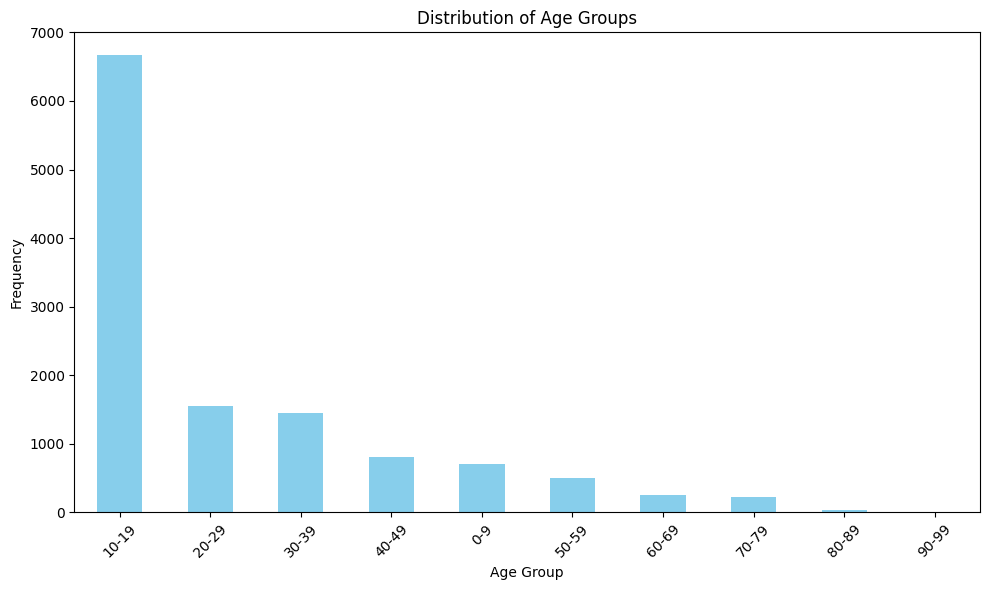

In [ ]:
# Assuming df is already defined and contains an 'age_group' column

# Plot the distribution of age groups
plt.figure(figsize=(10, 6))
age_group_counts = output_df['age_group'].value_counts()
age_group_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Distribution of Age Groups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Feature        Chi2       p-value
0           0  193.287973  1.616396e-09
1           1  239.871393  1.058747e-13
2           2  371.696835  4.482996e-26
3           3  509.154810  2.904586e-42
4           4  656.986803  1.535173e-66
...       ...         ...           ...
16379   16379  412.821734  9.009166e-28
16380   16380  331.138322  8.954032e-17
16381   16381  372.159191  3.840415e-26
16382   16382  287.595275  2.747679e-20
16383   16383  203.446355  9.220305e-11

[16384 rows x 3 columns]

      Feature        Chi2       p-value
0           0  193.287973  1.616396e-09
1           1  239.871393  1.058747e-13
2           2  371.696835  4.482996e-26
3           3  509.154810  2.904586e-42
4           4  656.986803  1.535173e-66
...       ...         ...           ...
16379   16379  412.821734  9.009166e-28
16380   16380  331.138322  8.954032e-17
16381   16381  372.159191  3.840415e-26
16382   16382  287.595275  2.747679e-20
16383   16383  203.446355  9.220305e-11

[16384 rows x 3 columns]


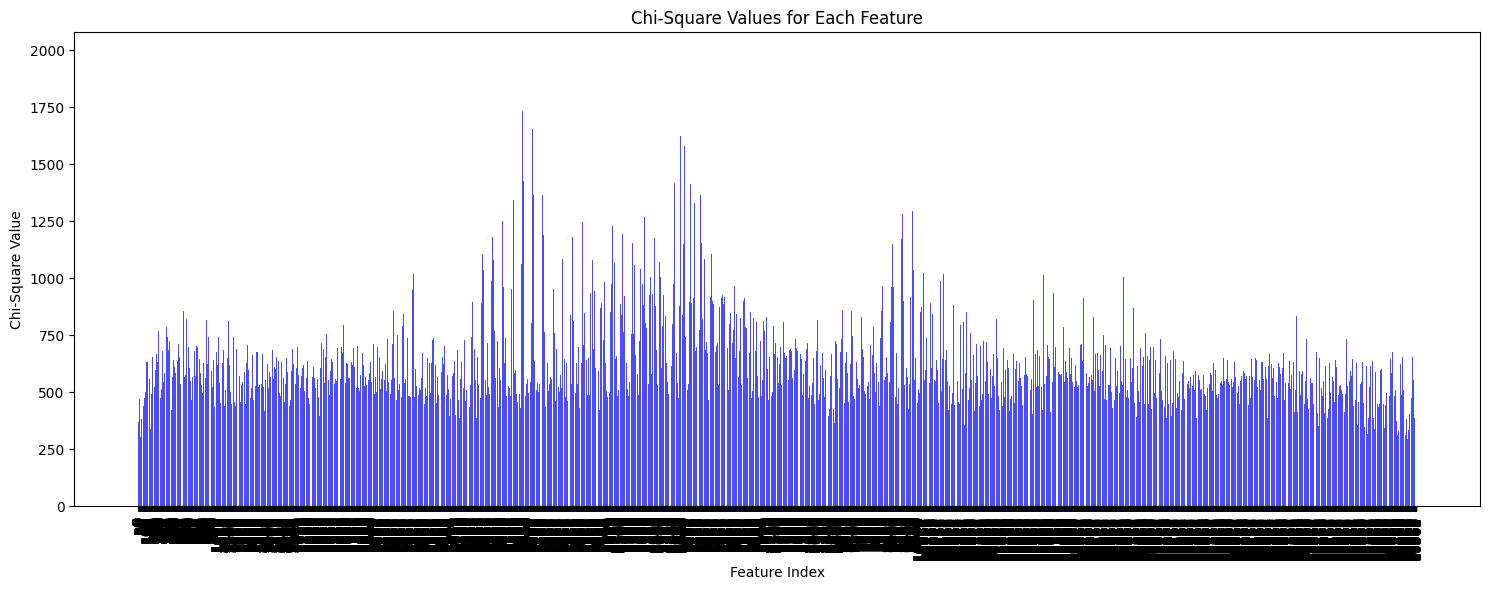

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming results_df is already defined with columns 'Feature', 'Chi2', and 'p-value'

# Display results_df to ensure it contains 'Feature' and 'Chi2' columns
display(results_df)
print(results_df)

# Plot chi-square values for each feature
plt.figure(figsize=(15, 6))
plt.bar(results_df['Feature'], results_df['Chi2'], color='blue', alpha=0.7)
plt.xlabel('Feature Index')
plt.ylabel('Chi-Square Value')
plt.title('Chi-Square Values for Each Feature')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
lbp_df

0     1     2     3     4     5     6     7     8     9  ...  16377  \
0       1.0  10.0  13.0  15.0  25.0   0.0   2.0  25.0  25.0   3.0  ...   25.0   
1       7.0   7.0   8.0   5.0  25.0   7.0   7.0   8.0   9.0   9.0  ...   25.0   
2       1.0   9.0  12.0  25.0  25.0   5.0  25.0  25.0  25.0   0.0  ...   11.0   
3       7.0  25.0   9.0   7.0  25.0  14.0   9.0   0.0  25.0  25.0  ...    8.0   
4       2.0   2.0  25.0  13.0  13.0  25.0   4.0   4.0  11.0  11.0  ...    6.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
12208  25.0   0.0   0.0   4.0   6.0   5.0   5.0   4.0  25.0  25.0  ...   10.0   
12209  25.0  25.0   2.0  25.0   0.0   6.0  25.0  25.0  25.0   1.0  ...    6.0   
12210   6.0  25.0   0.0   1.0  25.0   3.0   1.0  25.0  13.0  25.0  ...    0.0   
12211   0.0   0.0   0.0   6.0   8.0   6.0   1.0   5.0  13.0  15.0  ...    3.0   
12212   0.0   1.0   3.0  13.0  25.0  25.0  25.0  25.0  25.0   1.0  ...   12.0   

       16378  16379  16380  16381  16382  16383          filename  age  \
0       13.0   25.0   25.0    0.0    0.0    0.0      078A12_1.JPG   12   
1       25.0    9.0   11.0   25.0    2.0    3.0      078A05_1.JPG    5   
2       10.0   11.0   11.0    9.0    8.0    7.0      077A15_0.JPG   15   
3        8.0    9.0    9.0   25.0   25.0    0.0      076A01_0.JPG    1   
4        6.0    6.0    5.0    6.0    6.0    5.0      075A06_1.JPG    6   
...      ...    ...    ...    ...    ...    ...               ...  ...   
12208   13.0   13.0   25.0    5.0    1.0    1.0  282278_04M20.JPG   20   
12209    6.0    5.0    8.0    6.0    2.0    0.0  326393_02M19.JPG   19   
12210    0.0   25.0   25.0    7.0   25.0   25.0  326759_03M18.JPG   18   
12211   25.0   25.0   25.0    3.0    0.0    0.0  330586_03M16.JPG   16   
12212   12.0   11.0   11.0    6.0    0.0    0.0  279966_01M20.JPG   20   

       age_group  
0          10-19  
1            0-9  
2          10-19  
3            0-9  
4            0-9  
...          ...  
12208      10-19  
12209      10-19  
12210      10-19  
12211      10-19  
12212      10-19  

[12213 rows x 16387 columns]

chi-square test

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Assuming lbp_df already exists and has the LBP features and filenames

# Add age information to lbp_df
ages = []
for filename in lbp_df['filename']:
    age = df[df['filename'] == filename]['age'].values[0]
    ages.append(age)
lbp_df['age'] = ages

# Define age bins for 10-year intervals
bins = range(0, 101, 10)  # from 0 to 100, with intervals of 10
labels = [f'{i}-{i+9}' for i in bins[:-1]]
lbp_df['age_group'] = pd.cut(lbp_df['age'], bins=bins, labels=labels)

# Prepare to store Chi-Square results
chi2_results = []
p_values = []
features = []

# Perform Chi-Square test for each feature across age groups
for i in range(lbp_df.shape[1] - 3):  # Exclude 'age', 'filename', and 'age_group' columns
    feature_column = lbp_df.columns[i]
    contingency_table = pd.crosstab(lbp_df['age_group'], lbp_df[feature_column])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results.append(chi2)
    p_values.append(p)
    features.append(feature_column)

# Create a DataFrame for Chi-Square results
results_df = pd.DataFrame({
    'Feature': features,
    'Chi2': chi2_results,
    'p-value': p_values
})

# Display the results
from IPython.display import display
display(results_df)

print(results_df)


<ipython-input-35-d41eddcc7310>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contingency_table = pd.crosstab(lbp_df['age_group'], lbp_df[feature_column])
<ipython-input-35-d41eddcc7310>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contingency_table = pd.crosstab(lbp_df['age_group'], lbp_df[feature_column])
<ipython-input-35-d41eddcc7310>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

Feature      Chi2   p-value
0            0  4.791667  0.441831
1            1  5.833333  0.211946
2            2  5.000000  0.287297
3            3  7.222222  0.300784
4            4  5.138889  0.273341
...        ...       ...       ...
39995    39995  4.444444  0.487351
39996    39996  5.833333  0.322776
39997    39997  3.750000  0.585941
39998    39998  5.833333  0.322776
39999    39999  5.138889  0.399166

[40000 rows x 3 columns]

       Feature      Chi2   p-value
0            0  4.791667  0.441831
1            1  5.833333  0.211946
2            2  5.000000  0.287297
3            3  7.222222  0.300784
4            4  5.138889  0.273341
...        ...       ...       ...
39995    39995  4.444444  0.487351
39996    39996  5.833333  0.322776
39997    39997  3.750000  0.585941
39998    39998  5.833333  0.322776
39999    39999  5.138889  0.399166

[40000 rows x 3 columns]


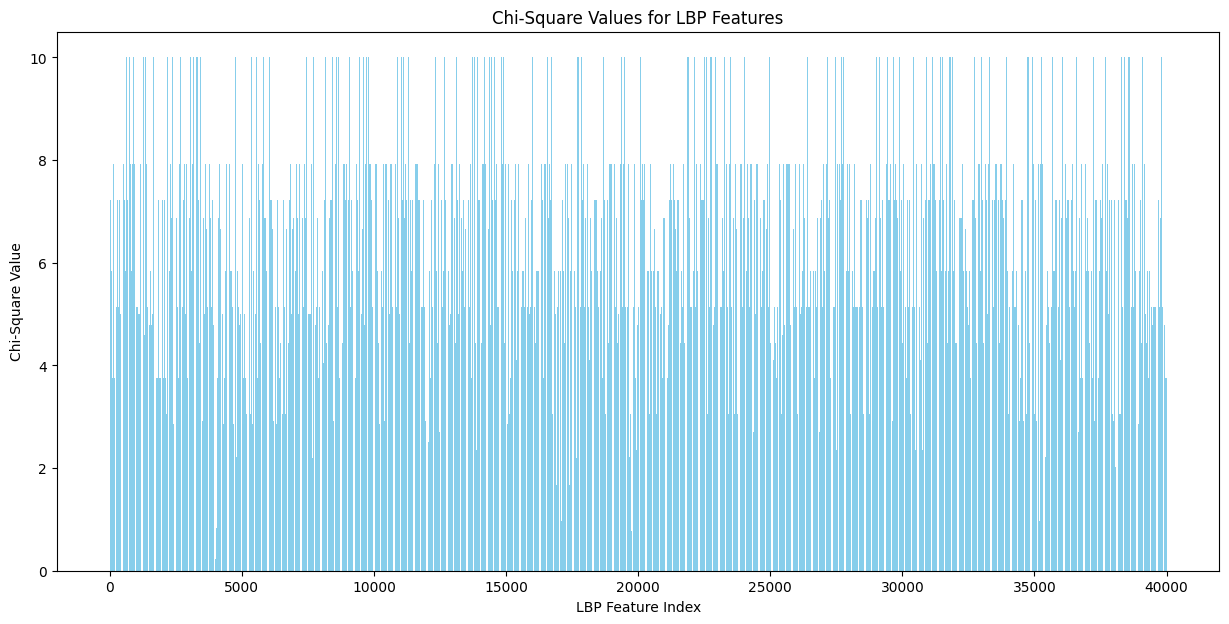

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from skimage import exposure
from skimage.feature import local_binary_pattern
import cv2

# Assuming lbp_df and results_df already exist from the previous steps

# Create a bar plot for Chi-Square values
plt.figure(figsize=(15, 7))
plt.bar(results_df['Feature'].astype(int), results_df['Chi2'], color='skyblue')
plt.xlabel('LBP Feature Index')
plt.ylabel('Chi-Square Value')
plt.title('Chi-Square Values for LBP Features')
plt.show()


Feature  Chi2   p-value
199        199  10.0  0.040428
271        271  10.0  0.040428
437        437  10.0  0.040428
549        549  10.0  0.040428
636        636  10.0  0.040428
...        ...   ...       ...
39131    39131  10.0  0.040428
39244    39244  10.0  0.040428
39282    39282  10.0  0.018566
39720    39720  10.0  0.040428
39728    39728  10.0  0.040428

[104 rows x 3 columns]

       Feature  Chi2   p-value
199        199  10.0  0.040428
271        271  10.0  0.040428
437        437  10.0  0.040428
549        549  10.0  0.040428
636        636  10.0  0.040428
...        ...   ...       ...
39131    39131  10.0  0.040428
39244    39244  10.0  0.040428
39282    39282  10.0  0.018566
39720    39720  10.0  0.040428
39728    39728  10.0  0.040428

[104 rows x 3 columns]


<ipython-input-38-e7cdd66f368e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  significant_lbp_df['age_group'] = lbp_df['age_group']


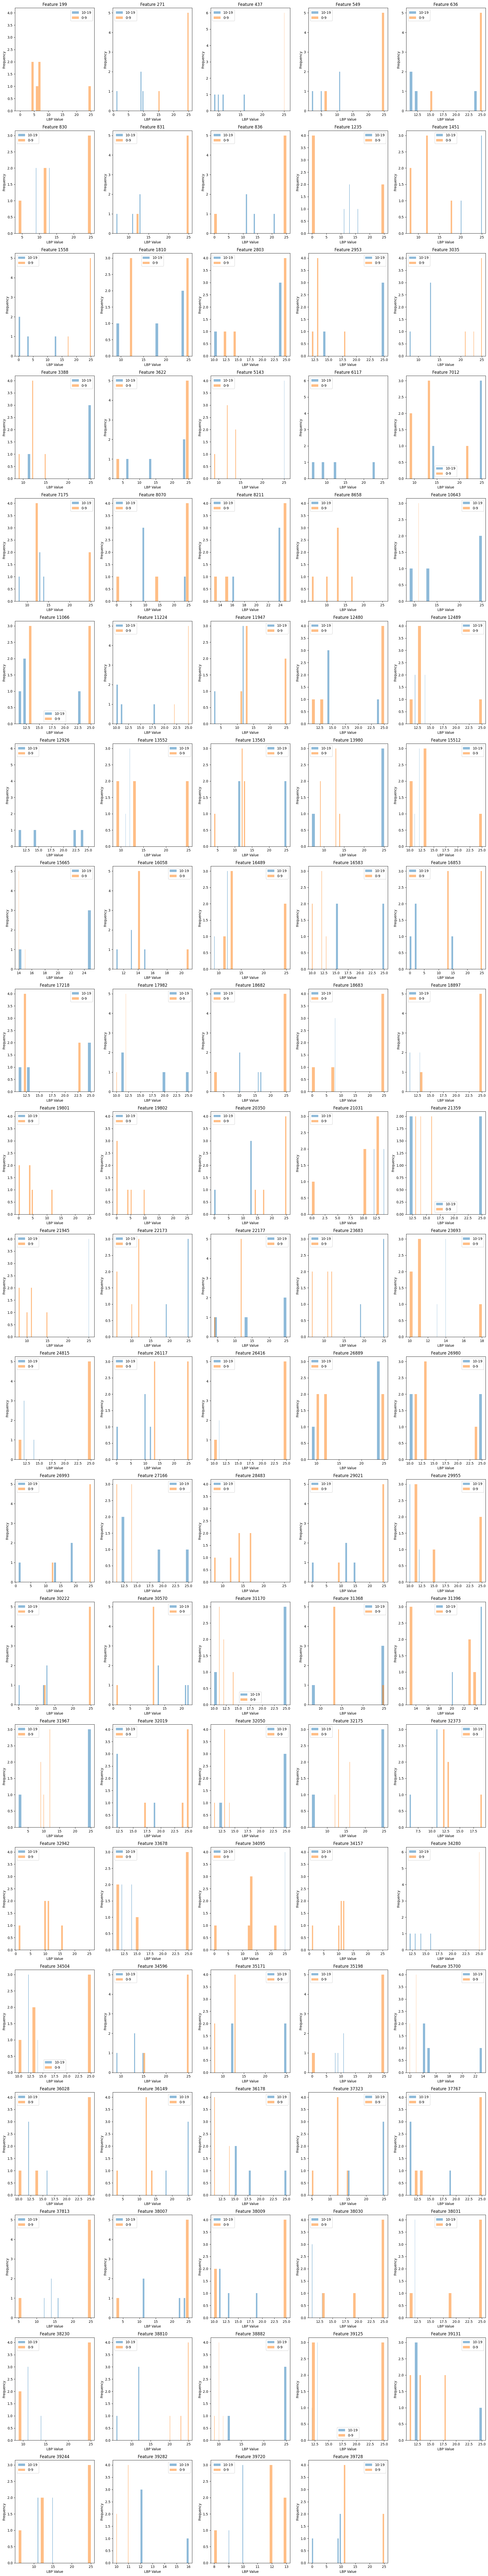

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming significant_features and lbp_df are already defined

# Identify significant features (p-value < 0.05)
significant_features = results_df[results_df['p-value'] < 0.05]

# Display significant features
display(significant_features)
print(significant_features)

# Filter lbp_df to include only significant features
significant_feature_indices = significant_features['Feature'].astype(int)
significant_lbp_df = lbp_df.iloc[:, significant_feature_indices]

# Add age group information
significant_lbp_df['age_group'] = lbp_df['age_group']

# Determine the number of subplots needed
num_significant_features = len(significant_feature_indices)
num_cols = 5
num_rows = (num_significant_features + num_cols - 1) // num_cols

# Plot histograms for significant features
plt.figure(figsize=(20, num_rows * 5))
for i, feature in enumerate(significant_feature_indices):
    plt.subplot(num_rows, num_cols, i + 1)
    for label in significant_lbp_df['age_group'].unique():
        subset = significant_lbp_df[significant_lbp_df['age_group'] == label]
        plt.hist(subset[feature], bins=26, alpha=0.5, label=str(label))
    plt.title(f'Feature {feature}')
    plt.xlabel('LBP Value')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()
